In [1]:
import numpy as np

import pandas as pd
import geopandas as gpd

import seaborn as sns
import matplotlib.pyplot as plt

import positron as pt

pd.set_option('display.max_columns', None)

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Set global seaborn theme
sns.set_theme(
        context='notebook',
        style='darkgrid',
        palette='dark',
        font='DejaVu Sans',
        color_codes=True
    )

def custom_theme(ax, title, xlabel, ylabel='Frequency'):
    ax.set_title(title, fontsize=18, fontweight='bold')
    ax.set_xlabel(xlabel, fontsize=14, fontweight='bold')
    ax.set_ylabel(ylabel, fontsize=14, fontweight='bold')
    ax.tick_params(axis='both', which='major', labelsize=12)

# Define a color for each property type
colors = {
    'building': '#3E64FF',
    'villa': '#FF6B6B',
    'unit': '#44CFCB',
    'land': '#F4A261'
}

type_order = ['unit', 'villa', 'building', 'land']  # fixed order

In [15]:
df = pd.read_parquet('./data/processed/transactions_clean.parquet')
df['actual_worth_usd'] = df['actual_worth_usd'] / 1000000

areas = gpd.read_file('./data/processed/transaction_land_areas.geojson')

### Basic Data Overview

In [5]:
df

,transaction_id,procedure_id,trans_group_id,trans_group,procedure_name,instance_date,property_type_id,property_type,property_sub_type_id,property_sub_type,property_usage,reg_type_id,reg_type,area_id,area_name,building_name,nearest_landmark,nearest_metro,nearest_mall,rooms,has_parking,procedure_area_sqm,actual_worth_aed,meter_sale_price_aed,actual_worth_usd,meter_sale_price_usd,price_to_size_ratio
0,1-11-2024-10138,11,1,sales,sell,2024-03-19,4,villa,NaN,None,residential,1,existing properties,278,mankhool,None,burj khalifa,adcb metro station,dubai mall,None,0,1305.29,5769000.0,4419.71,1.557630,1193.3217,0.91
1,3-9-2002-39,9,3,gifts,grant,2002-03-25,1,land,NaN,None,residential,1,existing properties,365,al hudaiba,None,burj khalifa,adcb metro station,dubai mall,None,0,1466.94,1105300.0,753.47,0.298431,203.4369,0.14
2,1-11-2016-12930,11,1,sales,sell,2016-11-02,4,villa,NaN,None,residential,1,existing properties,276,al bada,None,burj khalifa,emirates towers metro station,dubai mall,None,0,390.00,2089900.0,5358.72,0.564273,1446.8544,3.71
3,1-11-2005-300028,11,1,sales,sell,2005-02-28,4,villa,NaN,None,residential,1,existing properties,276,al bada,None,burj khalifa,trade centre metro station,dubai mall,None,0,396.09,511612.0,1291.66,0.138135,348.7482,0.88
4,1-11-2013-7839,11,1,sales,sell,2013-03-12,4,villa,NaN,None,residential,1,existing properties,276,al bada,None,burj khalifa,emirates towers metro station,dubai mall,None,0,362.32,1500000.0,4139.99,0.405000,1117.7973,3.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1397737,1-102-2025-9135,102,1,sales,sell - pre registration,2025-02-06,3,unit,60.0,flat,residential,0,off-plan properties,330,marsa dubai,bayview tower 2,None,None,None,1 B/R,1,70.72,3443888.0,48697.51,0.929850,13148.3277,185.92
1397738,1-102-2023-45846,102,1,sales,sell - pre registration,2023-09-11,3,unit,60.0,flat,residential,0,off-plan properties,330,marsa dubai,bayview tower 1,None,None,None,1 B/R,1,69.85,3664888.0,52467.97,0.989520,14166.3519,202.81
1397739,1-102-2024-879,102,1,sales,sell - pre registration,2024-01-08,3,unit,60.0,flat,residential,0,off-plan properties,330,marsa dubai,bayview tower 2,None,None,None,1 B/R,1,70.72,3705888.0,52402.26,1.000590,14148.6102,200.07
1397740,1-102-2023-46068,102,1,sales,sell - pre registration,2023-09-11,3,unit,60.0,flat,residential,0,off-plan properties,330,marsa dubai,bayview tower 2,None,None,None,1 B/R,1,53.16,2430888.0,45727.77,0.656340,12346.4979,232.25


In [6]:
facts = []

# Fact 1: The total number of transactions
total_transactions = df.shape[0]
facts.append(f'Total number of transactions: {total_transactions}')

# Fact 2: The number of unique areas
unique_areas = df['area_id'].nunique()
facts.append(f'Number of unique areas: {unique_areas}')

# Fact 3: The area with the most transactions
most_transactions_area = df['area_id'].value_counts().idxmax()
facts.append(f'Area with the most transactions: {most_transactions_area}')

# Fact 4: The most common transaction type
most_common_transaction_type = df['trans_group'].value_counts().idxmax()
facts.append(f'Most common transaction type: {most_common_transaction_type}')

# Fact 5: The most common transaction sub type
most_common_transaction_sub_type = df['property_sub_type'].value_counts().idxmax()
facts.append(f'Most common property sub type: {most_common_transaction_sub_type}')

# Fact 6: The most common registration type
most_common_registration_type = df['reg_type'].value_counts().idxmax()
facts.append(f'Most common registration type: {most_common_registration_type}')

# Fact 7: The most common usage
most_common_usage = df['property_usage'].value_counts().idxmax()
facts.append(f'Most common usage: {most_common_usage}')

# Fact 8: The most common property type
most_common_property_type = df['property_type'].value_counts().idxmax()
facts.append(f'Most common property type: {most_common_property_type}')

facts.append(f"Date Range: {df['instance_date'].min()} to {df['instance_date'].max()}")

for fact in facts:
    print(fact)

Total number of transactions: 1370792
Number of unique areas: 251
Area with the most transactions: 330
Most common transaction type: sales
Most common property sub type: flat
Most common registration type: existing properties
Most common usage: residential
Most common property type: unit
Date Range: 1966-01-18 00:00:00 to 2025-02-20 00:00:00


In [7]:
df[df['area_id'] == 330]

,transaction_id,procedure_id,trans_group_id,trans_group,procedure_name,instance_date,property_type_id,property_type,property_sub_type_id,property_sub_type,property_usage,reg_type_id,reg_type,area_id,area_name,building_name,nearest_landmark,nearest_metro,nearest_mall,rooms,has_parking,procedure_area_sqm,actual_worth_aed,meter_sale_price_aed,actual_worth_usd,meter_sale_price_usd,price_to_size_ratio
541,3-9-2022-2536,9,3,gifts,grant,2022-08-29,3,unit,60.0,flat,residential,1,existing properties,330,marsa dubai,dream tower,sports city swimming academy,jumeirah lakes towers,marina mall,2 B/R,1,136.47,1292231.0,9468.98,0.348902,2556.6246,18.73
542,1-11-2013-6182,11,1,sales,sell,2013-02-27,3,unit,60.0,flat,residential,1,existing properties,330,marsa dubai,dream tower,sports city swimming academy,jumeirah lakes towers,marina mall,1 B/R,1,74.16,600000.0,8090.61,0.162000,2184.4647,29.46
543,1-11-2024-14349,11,1,sales,sell,2024-04-29,3,unit,60.0,flat,residential,1,existing properties,330,marsa dubai,dream tower,sports city swimming academy,jumeirah lakes towers,marina mall,4 B/R,1,615.41,6500000.0,10562.06,1.755000,2851.7562,4.63
544,1-11-2010-11065,11,1,sales,sell,2010-07-14,3,unit,60.0,flat,residential,1,existing properties,330,marsa dubai,dream tower,sports city swimming academy,jumeirah lakes towers,marina mall,1 B/R,1,62.98,481000.0,7637.35,0.129870,2062.0845,32.74
545,1-11-2017-503,11,1,sales,sell,2017-01-11,3,unit,60.0,flat,residential,1,existing properties,330,marsa dubai,dream tower,sports city swimming academy,jumeirah lakes towers,marina mall,1 B/R,1,63.07,845000.0,13397.81,0.228150,3617.4087,57.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1397737,1-102-2025-9135,102,1,sales,sell - pre registration,2025-02-06,3,unit,60.0,flat,residential,0,off-plan properties,330,marsa dubai,bayview tower 2,None,None,None,1 B/R,1,70.72,3443888.0,48697.51,0.929850,13148.3277,185.92
1397738,1-102-2023-45846,102,1,sales,sell - pre registration,2023-09-11,3,unit,60.0,flat,residential,0,off-plan properties,330,marsa dubai,bayview tower 1,None,None,None,1 B/R,1,69.85,3664888.0,52467.97,0.989520,14166.3519,202.81
1397739,1-102-2024-879,102,1,sales,sell - pre registration,2024-01-08,3,unit,60.0,flat,residential,0,off-plan properties,330,marsa dubai,bayview tower 2,None,None,None,1 B/R,1,70.72,3705888.0,52402.26,1.000590,14148.6102,200.07
1397740,1-102-2023-46068,102,1,sales,sell - pre registration,2023-09-11,3,unit,60.0,flat,residential,0,off-plan properties,330,marsa dubai,bayview tower 2,None,None,None,1 B/R,1,53.16,2430888.0,45727.77,0.656340,12346.4979,232.25


In [157]:
# General Descriptive Stats
print("\nDescriptive statistics (all transactions):")
print(df[['actual_worth_usd', 'procedure_area_sqm']].describe())

# Grouped by property_type
print("\nGrouped by property type:")
print(df.groupby('property_type')[['actual_worth_usd', 'procedure_area_sqm']].mean())


Descriptive statistics (all transactions):
       actual_worth_usd  procedure_area_sqm
count      1.370792e+06        1.370792e+06
mean       6.467439e-01        6.483615e+02
std        1.467935e+00        8.385804e+04
min        2.700000e-07        1.000000e-02
25%        1.942103e-01        6.998000e+01
50%        3.510000e-01        1.134100e+02
75%        6.345000e-01        2.211400e+02
max        2.997844e+01        6.414803e+07

Grouped by property type:
               actual_worth_usd  procedure_area_sqm
property_type                                      
building               4.741418         4955.850149
land                   1.690903         4193.499062
unit                   0.365866           98.892027
villa                  0.701706          538.216498


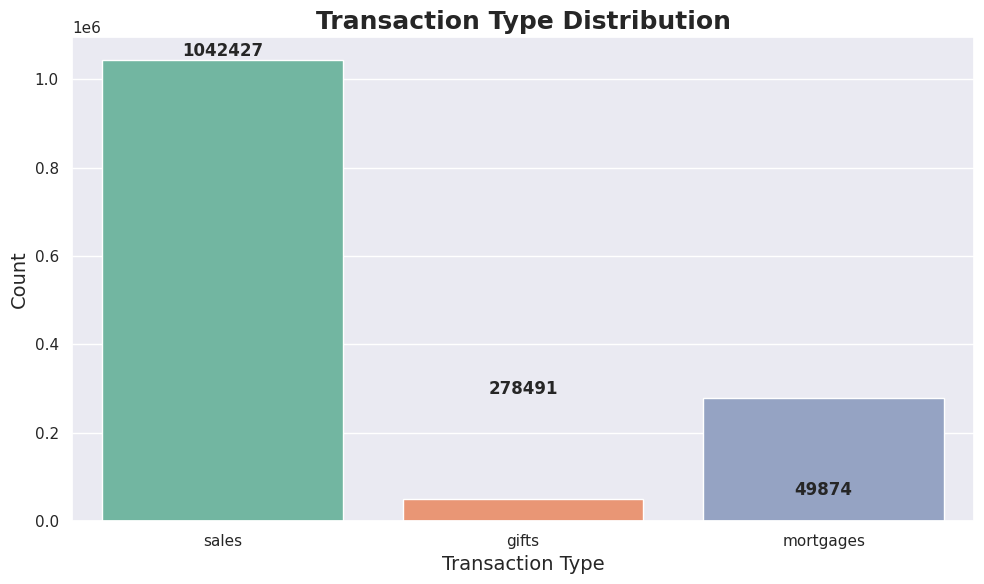

In [139]:
plt.figure(figsize=(10, 6))

# Create the barplot with different colors
palette = sns.color_palette("Set2")  # or any palette you like
sns.countplot(x='trans_group', data=df, palette=palette)

plt.title('Transaction Type Distribution', fontsize=18, fontweight='bold')
plt.xlabel('Transaction Type', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Annotate counts on top of bars
value_counts = df['trans_group'].value_counts()
for i, count in enumerate(value_counts):
    plt.text(i, count + 2, str(count),
             ha='center', va='bottom', fontsize=12, fontweight='semibold')

plt.tight_layout()
plt.show()

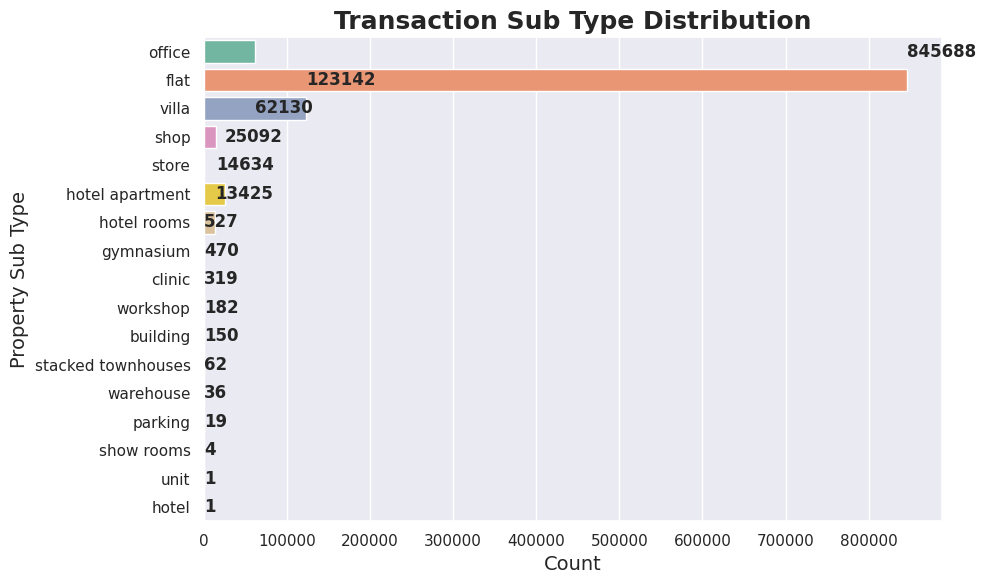

In [142]:
plt.figure(figsize=(10, 6))

# Use a nice colorful palette
palette = sns.color_palette("Set2")

# Horizontal countplot
sns.countplot(y='property_sub_type', data=df, palette=palette)

plt.title('Transaction Sub Type Distribution', fontsize=18, fontweight='bold')
plt.xlabel('Count', fontsize=14)
plt.ylabel('Property Sub Type', fontsize=14)

# Get value counts
value_counts = df['property_sub_type'].value_counts()

# Annotate counts properly
for i, (subtype, count) in enumerate(value_counts.items()):
    plt.text(count + 2, i, str(count), va='center', ha='left', fontsize=12, fontweight='semibold')

plt.tight_layout()
plt.show()

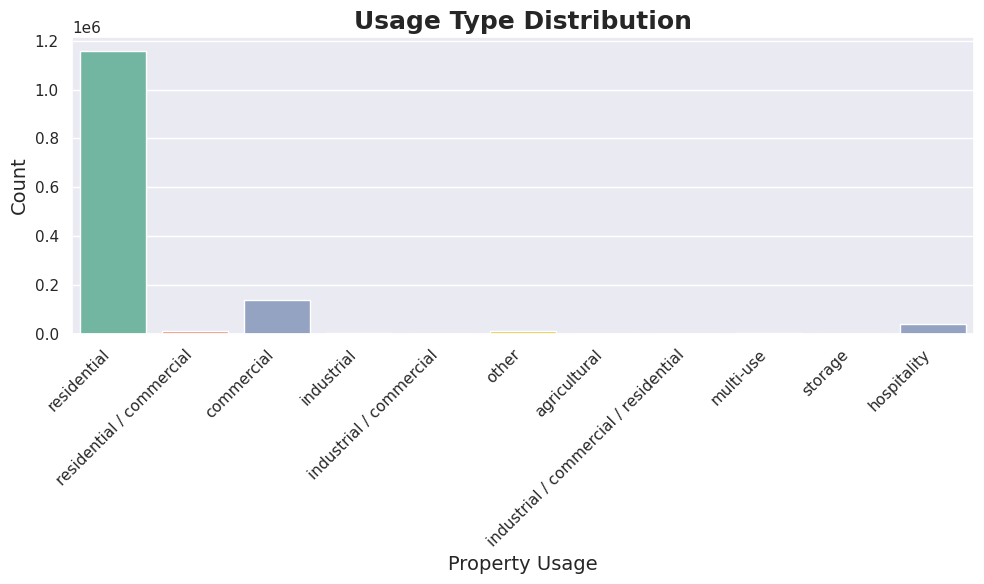

In [144]:
plt.figure(figsize=(10, 6))

# Use a nice color palette
palette = sns.color_palette("Set2")

# Create the countplot
sns.countplot(x='property_usage', data=df, palette=palette)

plt.title('Usage Type Distribution', fontsize=18, fontweight='bold')
plt.xlabel('Property Usage', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

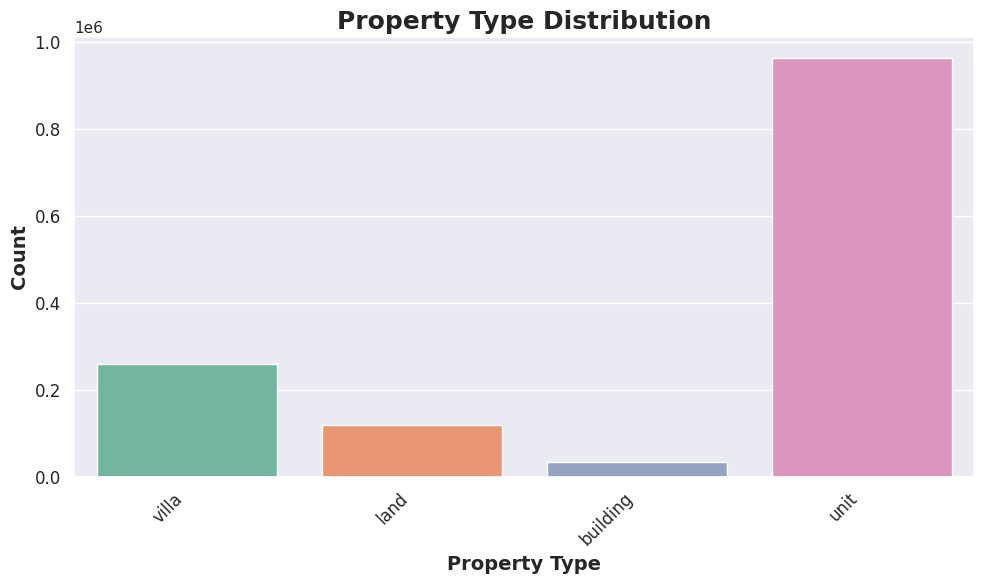

In [8]:
# Visual: Property Type Distribution
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='property_type', data=df, palette='Set2')  # added some colors

# Custom theme
custom_theme(ax, 'Property Type Distribution', 'Property Type', 'Count')

# Rotate x-ticks
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

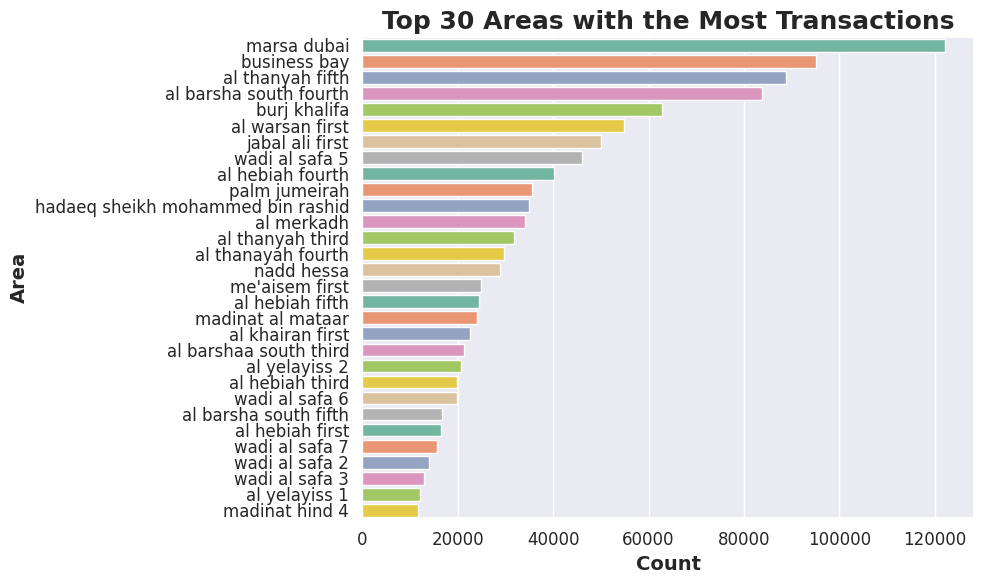

In [9]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(y='area_name', data=df, order=df['area_name'].value_counts().iloc[:30].index, palette='Set2')

# Custom theme
custom_theme(ax, 'Top 30 Areas with the Most Transactions', 'Count', 'Area')

# Rotate y-ticks for better readability
plt.yticks(rotation=0)

# Tighten layout
plt.tight_layout()
plt.show()

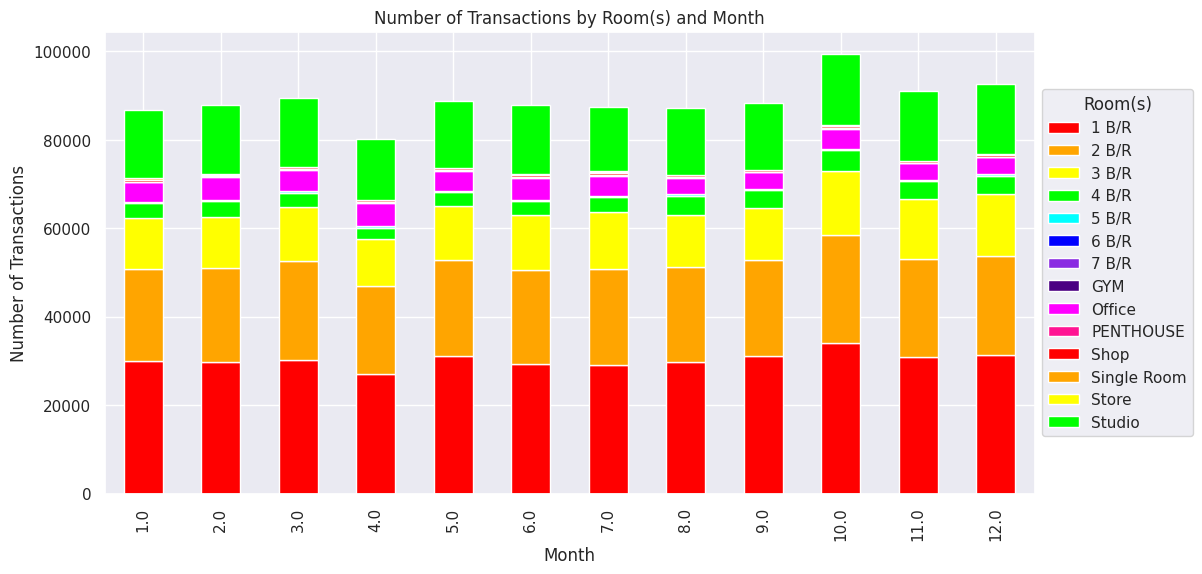

In [150]:
# Extract month from the transaction date
df['month'] = pd.to_datetime(df['instance_date']).dt.month

# Group by room and month, then count the number of transactions
room_month_counts = df.groupby(['rooms', 'month']).size().reset_index(name='counts')

# Pivot the data for the bar chart
pivot_df = room_month_counts.pivot(index='month', columns='rooms', values='counts')
# Define the custom color palette with luxury rainbow colors
colors = ['#FF0000', '#FFA500', '#FFFF00', '#00FF00', '#00FFFF', '#0000FF', '#8A2BE2', '#4B0082', '#FF00FF', '#FF1493']

# Plot the bar chart with the custom color palette
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 6), color=colors)
plt.title('Number of Transactions by Room(s) and Month')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')

# Place the legend outside the plot
plt.legend(title='Room(s)', loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

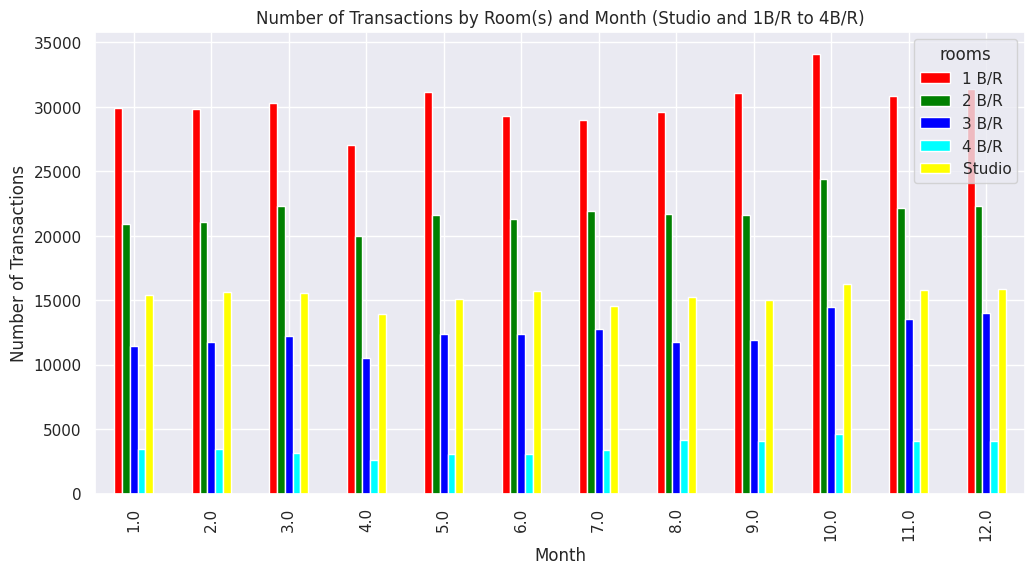

In [151]:
colors = ['red', 'green', 'blue', 'cyan', 'yellow', 'magenta']

# Filter the data for the specified room types
filtered_df = df[df['rooms'].isin(['Studio', '1 B/R', '2 B/R', '3 B/R', '4 B/R'])]

# Group by room and month, then count the number of transactions
room_month_counts = filtered_df.groupby(['rooms', 'month']).size().reset_index(name='counts')

# Pivot the data for the bar chart
pivot_df = room_month_counts.pivot(index='month', columns='rooms', values='counts')

# Plot the bar chart with the custom color palette
pivot_df.plot(kind='bar', stacked=False, figsize=(12, 6), color=colors)
plt.title('Number of Transactions by Room(s) and Month (Studio and 1B/R to 4B/R)')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.show()

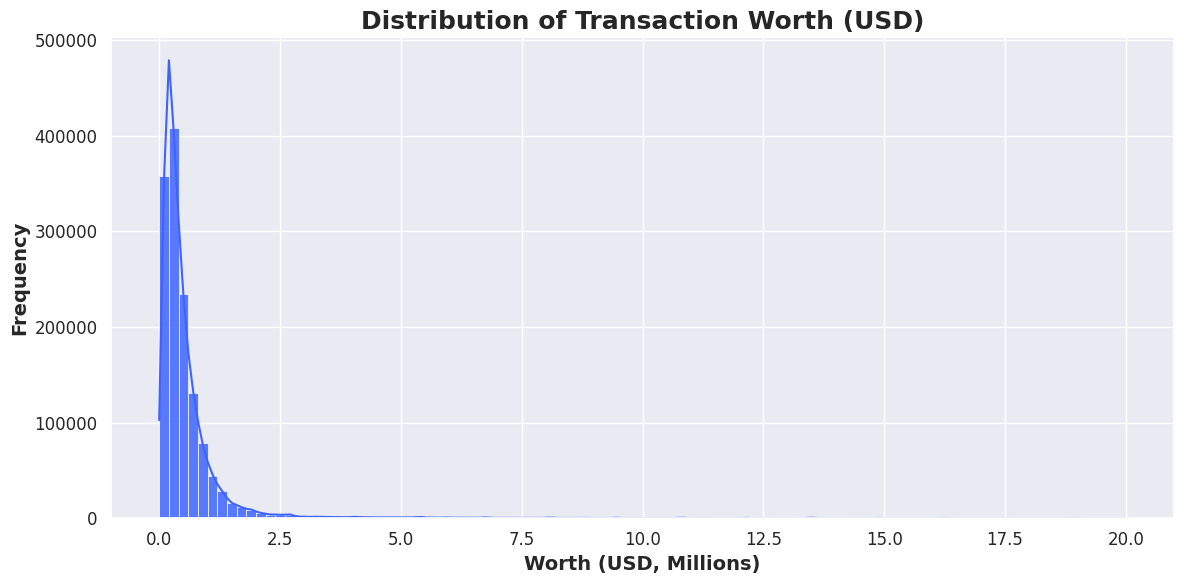

In [129]:
plt.figure(figsize=(12, 6))
ax = sns.histplot(df[df['actual_worth_usd'] <= 20]['actual_worth_usd'], bins=100, kde=True, color='#3E64FF', edgecolor='white', linewidth=0.5, alpha=0.85)

# Custom theme
custom_theme(ax, 'Distribution of Transaction Worth (USD)', 'Worth (USD, Millions)')
plt.tight_layout()
plt.show()

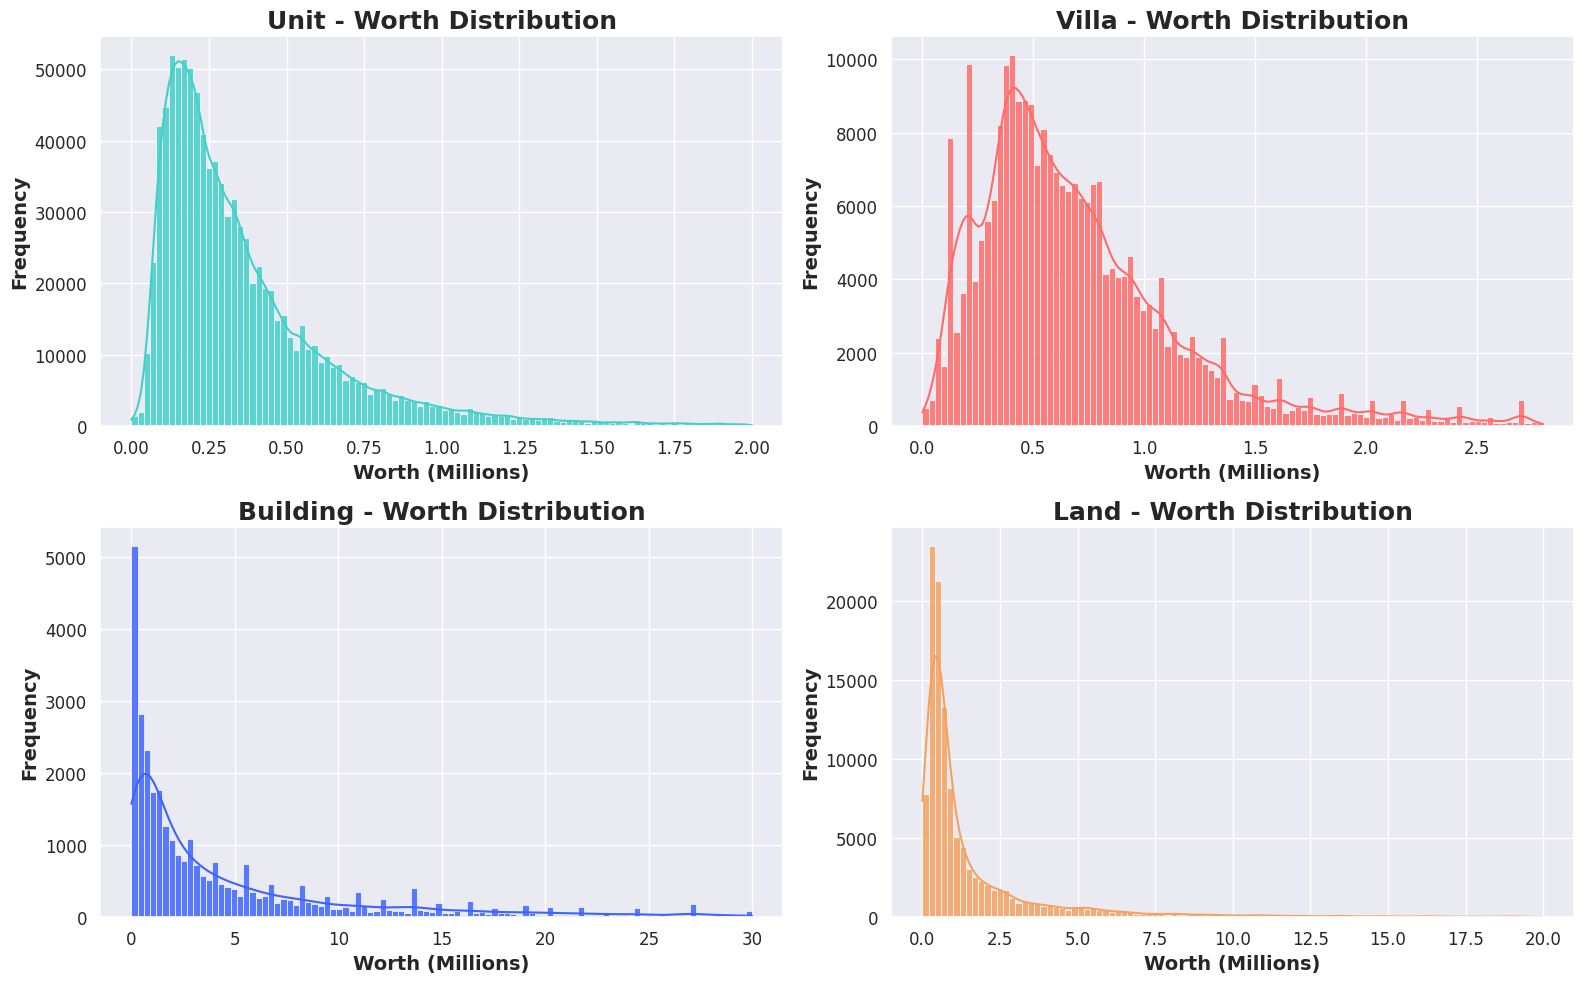

In [111]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

for i, prop_type in enumerate(type_order):
    ax = axes[i]
    subset = df[df['property_type'] == prop_type]
    sns.histplot(
        subset['actual_worth_usd'],
        bins=100,
        kde=True,
        color=colors[prop_type],
        edgecolor='white',
        linewidth=0.5,
        alpha=0.85,
        ax=ax
    )
    custom_theme(ax, f'{prop_type.capitalize()} - Worth Distribution', 'Worth (Millions)')

plt.tight_layout()
plt.show()

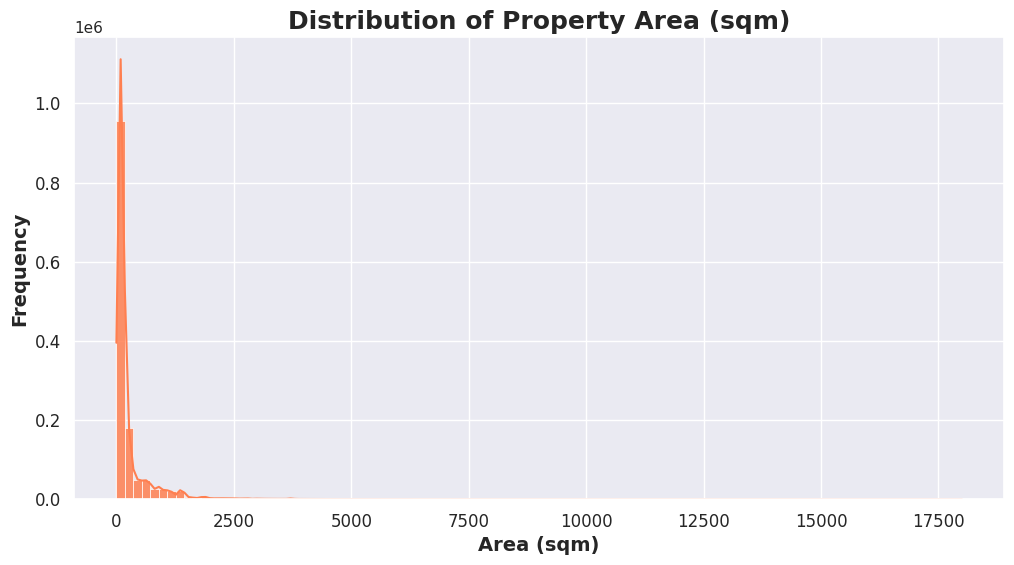

In [112]:
plt.figure(figsize=(12, 6))
ax = sns.histplot(df[df['procedure_area_sqm'] <= 18000]['procedure_area_sqm'], bins=100, kde=True, color='#FF7F50', edgecolor='white', linewidth=0.5, alpha=0.85)

custom_theme(ax, 'Distribution of Property Area (sqm)', 'Area (sqm)')
plt.show()

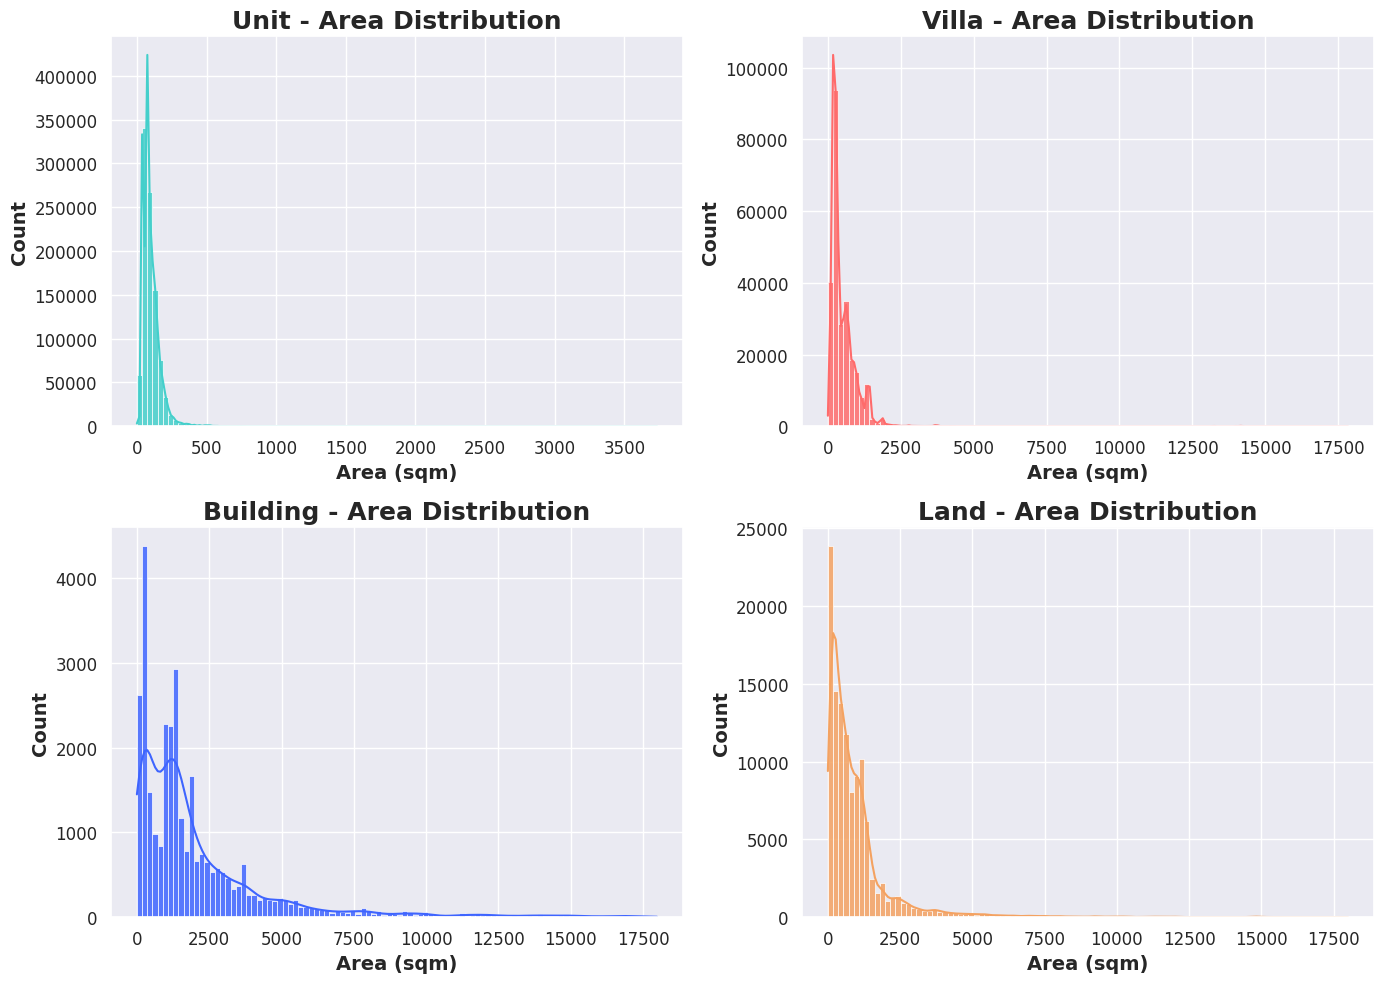

In [113]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, ptype in enumerate(type_order):
    ax = axes[i]
    subset = df[(df['property_type'] == ptype) & (df['procedure_area_sqm'] <= 18000)]
    sns.histplot(
        subset['procedure_area_sqm'],
        bins=100,
        kde=True,
        color=colors[ptype],
        edgecolor='white',
        linewidth=0.5,
        alpha=0.85,
        ax=ax
    )
    
    custom_theme(ax, f'{ptype.capitalize()} - Area Distribution', 'Area (sqm)')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

In [114]:
df['actual_worth_usd'].describe([0.99])

count    1.370792e+06
mean     6.467439e-01
std      1.467935e+00
min      2.700000e-07
50%      3.510000e-01
99%      6.750000e+00
max      2.997844e+01
Name: actual_worth_usd, dtype: float64

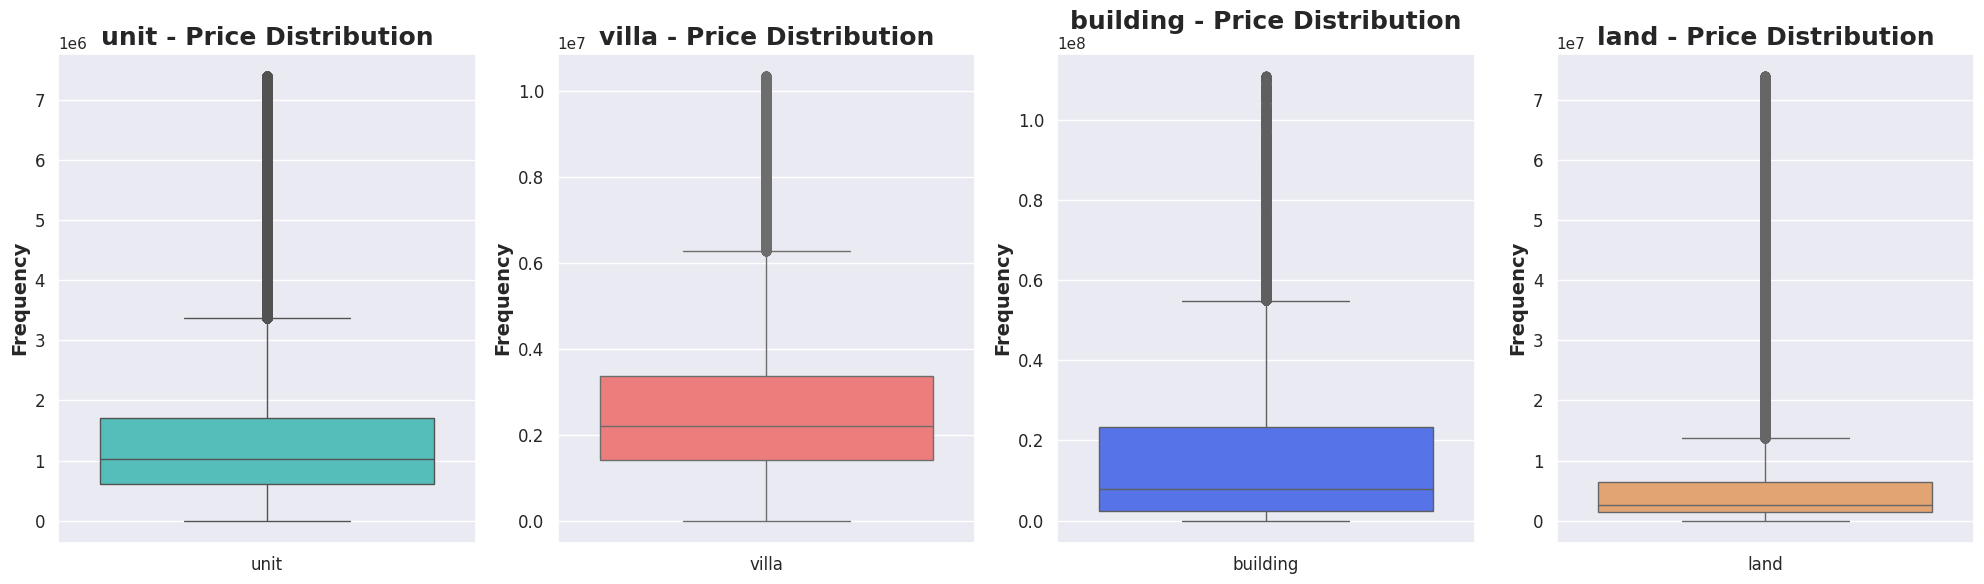

In [125]:
fig, axes = plt.subplots(1, 4, figsize=(20, 6))  # 1 row, 4 columns
axes = axes.flatten()

for i, ptype in enumerate(type_order):
    ax = axes[i]
    subset = df[df['property_type'] == ptype]
    sns.boxplot(
        data=subset,
        x='property_type',
        y='actual_worth_aed',
        palette={ptype: colors[ptype]},
        ax=ax
    )
    custom_theme(ax, f'{ptype} - Price Distribution', 'Actual Worth (Millions)')
    ax.set_xlabel('')
    ax.set_xticklabels([ptype], rotation=0)

plt.tight_layout()
plt.show()

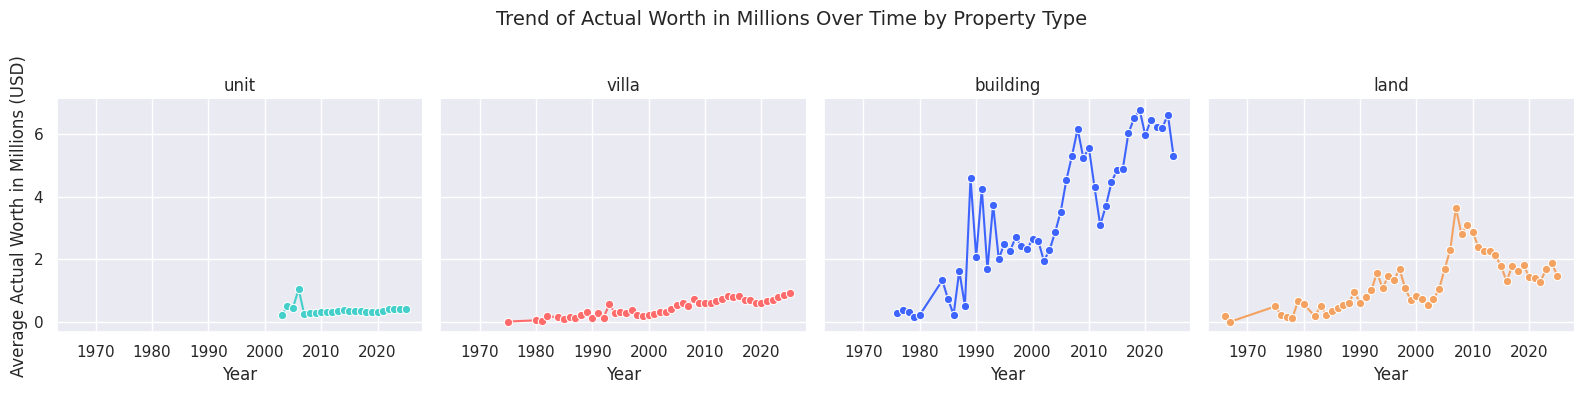

In [124]:
# Ensure datetime format
df['instance_date'] = pd.to_datetime(df['instance_date'])
df['year'] = df['instance_date'].dt.year
df['month'] = df['instance_date'].dt.month

# Group by year and property type, then compute the mean actual worth
trend_data = df.groupby(['year', 'property_type'])['actual_worth_usd'].mean().reset_index()

# Set up FacetGrid for separate line plots by property type, following the type order
g = sns.FacetGrid(trend_data, col="property_type", col_wrap=4, height=4, sharex=True, sharey=True,
                  col_order=type_order)

# Map the lineplot function with custom colors
g.map_dataframe(sns.lineplot, x="year", y="actual_worth_usd", marker="o", hue="property_type",
                palette=colors)

# Titles and layout adjustments
g.set_titles(col_template="{col_name}")
g.fig.suptitle("Trend of Actual Worth in Millions Over Time by Property Type", fontsize=14)
g.set_axis_labels("Year", "Average Actual Worth in Millions (USD)")

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [24]:
areas

,area_id,comm_number,name,area_sqm,building_total_worth_usd_millions,land_total_worth_usd_millions,unit_total_worth_usd_millions,villa_total_worth_usd_millions,total_worth_usd_millions,building,land,unit,villa,worth_per_sqm,unit_worth_per_sqm,villa_worth_per_sqm,building_worth_per_sqm,land_worth_per_sqm,properties_count,mean_distance_to_venues,median_distance_to_venues,geometry
0,453.0,531.0,saih shuaib 2,2.610625e+07,718.498395,2061.573608,80.733924,131.964364,2992.770291,108.0,601.0,483.0,438.0,114.638085,3.092513,5.054896,27.522085,78.968590,1630.0,NaN,NaN,"POLYGON ((55.00949 24.85906, 55.04427 24.83957..."
1,410.0,381.0,nakhlat jumeira,2.674180e+07,781.595611,4552.555155,20711.272568,4938.248851,30983.672184,49.0,1536.0,30622.0,3370.0,1158.623137,774.490495,184.664017,29.227483,170.241142,35577.0,-4435.888889,-3947.0,"POLYGON ((55.14542 25.09321, 55.14590 25.09281..."
2,368.0,373.0,al barsha first,3.954266e+06,8504.423309,2103.456455,100.629835,112.151759,10820.661357,947.0,378.0,367.0,83.0,2736.452375,25.448421,28.362217,2150.695655,531.946082,1775.0,-2603.680000,-1952.0,"POLYGON ((55.20902 25.11838, 55.20817 25.11895..."
3,435.0,682.0,al hebiah fourth,9.145534e+06,1024.202125,6341.834272,5606.325804,6721.344959,19693.707159,147.0,2540.0,29385.0,8140.0,2153.368809,613.012422,734.931949,111.989322,693.435116,40212.0,-1443.090909,-1663.0,"POLYGON ((55.22886 25.03974, 55.22665 25.04414..."
4,451.0,683.0,al hebiah fifth,8.093324e+06,45.335454,8448.710631,3100.093374,256.921808,11851.061267,5.0,11055.0,13123.0,268.0,1464.300941,383.043303,31.744908,5.601587,1043.911144,24451.0,NaN,NaN,"POLYGON ((55.25201 25.01084, 55.24750 25.01573..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,398.0,711.0,al awir first,3.971613e+07,155.876962,1178.130321,0.000000,6.581451,1340.588734,70.0,3910.0,0.0,21.0,33.754260,0.000000,0.165712,3.924777,29.663771,4001.0,-4574.000000,-4574.0,"POLYGON ((55.63303 25.19255, 55.62934 25.21013..."
186,323.0,248.0,al qusais ind. fifth,2.395555e+06,253.350759,607.700590,28.725144,0.000000,889.776493,44.0,98.0,158.0,0.0,371.428129,11.991019,0.000000,105.758692,253.678418,300.0,NaN,NaN,"POLYGON ((55.42775 25.28670, 55.42681 25.28704..."
187,402.0,265.0,oud al muteena first,3.628021e+06,24.651000,143.622352,0.000000,175.152555,343.425907,5.0,415.0,0.0,847.0,94.659300,0.000000,48.277716,6.794614,39.586971,1267.0,NaN,NaN,"POLYGON ((55.46027 25.27242, 55.45839 25.27288..."
188,524.0,857.0,margab,3.463383e+07,15.955897,7.846120,0.000000,0.000000,23.802017,12.0,4.0,0.0,0.0,0.687248,0.000000,0.000000,0.460703,0.226545,16.0,-9603.000000,-9603.0,"POLYGON ((55.64260 24.78481, 55.61671 24.85200..."


### Isochrones

In [159]:
metro_stations = gpd.read_file('./data/processed/dubai_metro_stations.geojson')

In [168]:
iso = pt.compute_isochrones(metro_stations, uid='station_no', base_url='https://valhalla-api.alm2.perigonai.com/', intervals=[5, 10, 15], api_key='gkewAYNz56C2DKXaiokJmAdjvG7ZjJ')

Generating Isochrones:   0%|          | 0/56 [00:00<?, ?it/s]

In [169]:
iso

,station_no,intervals,geometry
0,e07,15,"POLYGON ((55.17420 25.10338, 55.17415 25.10243..."
1,e07,10,"POLYGON ((55.21220 25.04638, 55.21119 25.04638..."
2,e07,5,"POLYGON ((55.14720 24.99674, 55.14717 24.99440..."
3,g11,15,"POLYGON ((55.49101 25.42082, 55.49097 25.41984..."
4,g11,10,"POLYGON ((55.46001 25.37085, 55.45803 25.37081..."
...,...,...,...
163,r74,10,"POLYGON ((55.21284 25.07980, 55.21282 25.07882..."
164,r74,5,"POLYGON ((55.17984 25.03580, 55.17883 25.03580..."
165,r75,15,"POLYGON ((55.24814 25.11908, 55.24802 25.11813..."
166,r75,10,"POLYGON ((55.19714 25.06138, 55.19711 25.06004..."


In [170]:
iso.to_file('./data/processed/metro_station_isochrones.geojson')